In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import sys
sys.path.append("./../code/")
from piCurve import *
from matplotlib import cm
from gwBackground import *
from makeDelayedRateData import *
from scipy.special import gammainc
from geometry import *

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [2]:
# Input data
freqs,C_H1V1_O3,sigma_H1V1_O3 = np.loadtxt('../input/H1V1_O3.dat',unpack=True,skiprows=1)

In [3]:
# Instantiate baseline objects
H1V1 = Baseline(Detector.H1(),Detector.V1())

# Use baseline objects to compute overlap reduction functions for Stokes-I and Stokes-V signals
H1V1_gammaI,H1V1_gammaV = H1V1.stokes_overlap_reduction_functions(freqs)

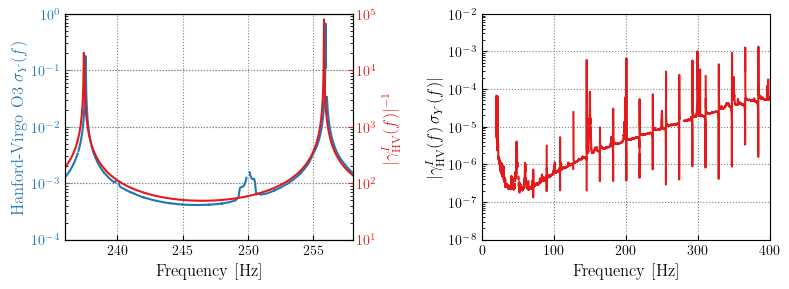

In [4]:
fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(121)
ax1.plot(freqs,sigma_H1V1_O3,color=blue)
ax1.set_yscale('log')
ax1.set_xlim(236,258)
ax1.set_ylim(1e-4,1e0)
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Hanford-Virgo O3 $\sigma_Y(f)$',color=blue)
ax1.tick_params(axis='y', colors=blue)

ax2 = ax1.twinx()
ax2.plot(freqs,1/np.abs(H1V1_gammaI),color=red)
ax2.set_yscale('log')
ax2.set_ylim(10,1e5)
ax2.set_ylabel(r'$|\gamma^I_\mathrm{HV}(f)|^{-1}$',color=red)
ax2.tick_params(axis='y', colors=red)

ax = fig.add_subplot(122)
ax.plot(freqs,sigma_H1V1_O3*np.abs(H1V1_gammaI),color=red)
ax.set_yscale('log')
ax.set_ylim(1e-8,1e-2)
ax.set_xlim(0,400)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel(r'$|\gamma^I_\mathrm{HV}(f)\,\sigma_Y(f)|$')

plt.tight_layout()
plt.subplots_adjust(wspace=0.45)
plt.savefig('figure_16.pdf',bbox_inches='tight',dpi=200)
plt.show()